<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/7_Ensemble_Learning_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble learning
A group of predictors is called an ensemble; and an Ensemble Learning algorithm is called an Ensemble method

1. Ensemble method works best when the predictors are as independent from one another as possible,
2. Another method is to use bagging/pasting to train the same classifer on random samples of the training data and ensemble the classifers to predict for a new instance by aggregating the predictions of all the classifiers. 


## Voting classifiers
1. The majority-vote classifier is called a *hard voting* classifier.
2. If each classifier is able to estimate class probabilities (i.e., they all have a predict_proba() method), use sklearn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft voting* 

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
# hard voting

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

Accuracy score is the fraction of samples predicted correctly: $(TP+TN)/(TP+TN+FP+FN)$

In [3]:
from sklearn.metrics import accuracy_score

print("Invidual classifers compared to hard voting classifier")
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  

  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Invidual classifers compared to hard voting classifier
LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


In [4]:
# soft voting

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'soft'
)


print("Invidual classifers compared to soft voting classifier")
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  

  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


Invidual classifers compared to soft voting classifier
LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## Bagging and pasting
Another method is to use the same training algorithm for every predictor and train them on different random subsets of the training set. Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. 

1. ***Bagging***: when sampling is performed *with* replacement
2. ***Pasting***: when sampling is performed *without* replacement

Set bootstrap in BaggingClassifier to be false to use Pasting. 

n_estimator sets # of the classifiers to train. max_samples set # of instances used to train each classifier. set n_jobs = -1 to use all of the CPU cores. 

The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities. 

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, 
    max_samples = 100, bootstrap=True, n_jobs = -1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [6]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3], iris = True, legend = False, 
                           plot_training = True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)
  if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap2)
  if plot_training:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label = "Iris setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label = "Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label = "Iris virginica")
    plt.axis(axes)
  if iris:
    plt.xlabel("Petal length", fontsize = 14)
    plt.xlabel("Petal width", fontsize = 14)
  else:
    plt.xlabel(r"$x_1$", fontsize = 18)
    plt.xlabel(r"$x_2$", fontsize = 18, rotation = 0)
  if legend:
    plt.legend(loc = "lower right", fontsize = 14)


Text(0.5, 1.0, 'Decision Tree with Bagging')

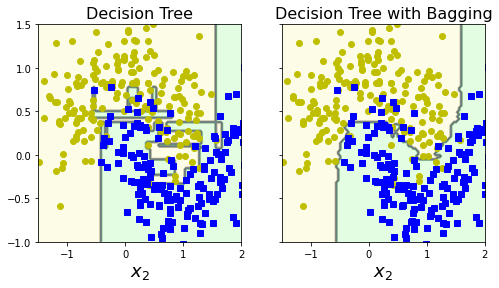

In [8]:

base_clf = DecisionTreeClassifier()
base_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols = 2, figsize = (8, 4), sharey=True)


plt.sca(axes[0])
plot_decision_boundary(base_clf, X_train, y_train, axes = [-1.5, 2, -1, 1.5],
                       iris = False)
plt.title("Decision Tree", fontsize = 16)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train, axes = [-1.5, 2, -1, 1.5],
                       iris = False)

plt.title("Decision Tree with Bagging", fontsize = 16)

Only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are called *out-of-bag* (oob) instances.

Set oob_true = True when creating a BaggingClassifier to request an automatic oob evaluating after training.

In [9]:
bag_clf = BaggingClassifier(
    base_clf, n_estimators = 500,
    bootstrap = True, n_jobs = -1, oob_score = True, random_state = 42

)
bag_clf.fit(X_train, y_train)
print("oob accuracy is {:.2%}".format(bag_clf.oob_score_))

y_pred = bag_clf.predict(X_test)
print("test accuracy is {:.2%}".format(accuracy_score(y_test, y_pred)))


oob accuracy is 89.60%
test accuracy is 92.00%


In [10]:
bag_clf.oob_decision_function_

print("the oob evaluation "\
      "estimates that the first training instance has {:.2%} belonging to negative class".format(
  bag_clf.oob_decision_function_[0][0]
    
))

the oob evaluation estimates that the first training instance has 32.35% belonging to negative class


In [11]:
bag_clf.oob_decision_function_[0][0]

0.3235294117647059

#Random Forest classifier
Random Forest is an ensemble of Decision Trees, generally trained via the bagging method, typically with *max_samples* set to the size of the training set. 

Random Forest searches for the best feature among a random subset of features. It trades more bias for a lower variance. 

The following code uses all available CPU cores to train a Random Forest classifier with 500 trees, each limited to maximum 16 nodes.

Another technique is called *Extremely Randomized Trees* ensemble. It uses random *thresholds* for each feature rather than searching for the best possible thresholds. It trades more bias for a lower variance. 

The only way to know which is better between Random Forest and Extra-Trees is to try both and compare them using cross-validation (tuning the hyperparameters using grid search). 

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [13]:
# the following runs the same as the code in the previous block
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="auto", max_leaf_nodes=16),
    n_estimators=500, max_samples = 1.0, bootstrap=True, n_jobs = -1
)

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs = -1, random_state=42)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


Text(0.5, 0, 'Random Forest Feature Importance')

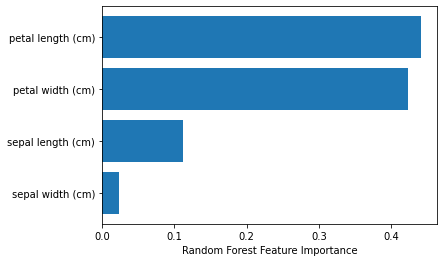

In [15]:
sorted_idx = rnd_clf.feature_importances_.argsort()
plt.barh([iris.feature_names[i] for i in list(sorted_idx)],
         rnd_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [16]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version = 1, as_frame = False)
mnist.target = mnist.target.astype(np.uint8)


In [17]:
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rnd_clf.fit(mnist['data'], mnist['target'])

RandomForestClassifier(random_state=42)

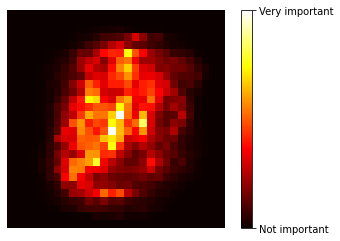

In [18]:
import matplotlib as mpl
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap = mpl.cm.hot, interpolation="nearest")
  plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks = [rnd_clf.feature_importances_.min(),
                             rnd_clf.feature_importances_.max()]
                    )

cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# Boosting
Boosting is to fit a decision tree to the residuals from the model. We fit a tree using the current residual and we then add this new decision tree into the fitted function in order to update the residual. Each of these trees can be rather small, with just a few terminal nodes, determined by the parameter *d*.



## AdaBoost
A new predictor corrects its predecessor by paying a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases.

Classifiers are trained on *weighted* versions of the training data, and then combined through a weighted majority vote to produce a final prediction.

Learning algorithim is outlined as follows. The core of this is that the basis function $G_{n}(x)$ is a weaker learner (a "stump", a tree composed of a single decision node plus two leaf nodes). But as boosting iterations proceed the error rate steadily declines. 

*   Initialize the observation weights $w_{i} = 1/m, i = 1, 2, ..., m$
*   For classifier j = 1 to N:
>Fit a classifier $G_{j}(x)$ to the training data using weights $w_{i}$. \\
>Compute $r_{j} = \frac{\sum_{i=1}^{m}w_{i}I(y_{i}\neq G_{j}(x_{i}))}{\sum_{i=1}^{m}w_{i}}$\
> Compute $α_{j} = log\frac{(1-r_{j})}{r_{j}}$ \\
> Set $w_{i}←w_{i}*exp(α_{j}I(y_{i}\neq G_{j}(x)))$\
> Normalize all the instance weights 

*   Output $G(x) = \sum_{j=1}^{n}α_{j}G_{j}(x)$

AdaBoost uses Exponential Loss function that is equivalent to forward stagwise additive modeling. \\

$(β_{j}, G_{j}) = argmin_{β, G}\sum_{i=1}^{m}exp[-y_{i}(f_{j-1}(x_{i}) + βG(x_{i}))]$


Scikit-Learn uses *Stagewise Additive Modeling useing a Multiclass Exponential loss function* (SAMME). The following code trains an AdaBoost classifier based on 200 *Decision Stumps*. A Decision Stump is a Decision Tree with *max_depth = 1*. Learning method *SAMME.R* relies on class probabilities rather than predictions. Learning rate parameter is applied to error rate as 
$\alpha_{j} =ηlog\frac{1-r_{j}}{r_{j}}$ 


In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 200, 
    algorithm = "SAMME.R", learning_rate = 0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [21]:
def plot_decision_boundary2(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

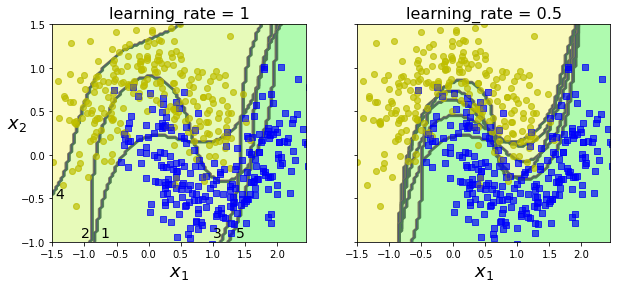

In [26]:
# manually produce learning algorithm
# basis function is a SVM classifier with a RBF kernel
m = len(X_train)
 
fix, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
  sample_weights = np.ones(m)/m
  plt.sca(axes[subplot])
  
  for i in range(5):
    svm_clf = SVC(kernel = "rbf", C = 0.2, gamma = 0.6, random_state = 42)
    svm_clf.fit(X_train, y_train, sample_weight = sample_weights * m)
    y_pred = svm_clf.predict(X_train)

    r = sample_weights[y_pred != y_train].sum() / sample_weights.sum()
    alpha = learning_rate * np.log((1-r)/r)
    sample_weights[y_pred!=y_train] *= np.exp(alpha)
    sample_weights /=sample_weights.sum()

    plot_decision_boundary2(svm_clf, X, y, alpha = 0.2)
    plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

  if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
  else:
      plt.ylabel("")



## Gradient Boosting
Instead of tweaking the instance weights at every iteration, Gradient Boosting tries to fit the new predictor to the *residual errors* made by the previous predictor.

The following code trains *Gradient Boosted Regression Trees (GBRT)*.

When using GradientBoostRegressor, *learning rate* regularizes the contribution of each tree to prediction. When learning rate is lower, one needs more trees in the ensemble to fit the training set, but the predictios will usually generalize better. This technique is called *shrinkage*

In order to find the optimal number of trees, one can use early stopping. A simple way to implement this is to use the *staged_predict()* method. it returns an iterator over the predictions made by the ensemble at each stage of training (with one tree, two trees, etc).

In [82]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)


# first tree trained on the training set
tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg1.fit(X, y)

# second tree trained on the residual
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg2.fit(X, y2)

# third tree trained on the residual from y2
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg3.fit(X, y3)

# make predictions on a new instance by adding up the predictions of all the trees
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

              
y_pred


array([0.75026781])

In [65]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

Text(0, 0.5, 'y')

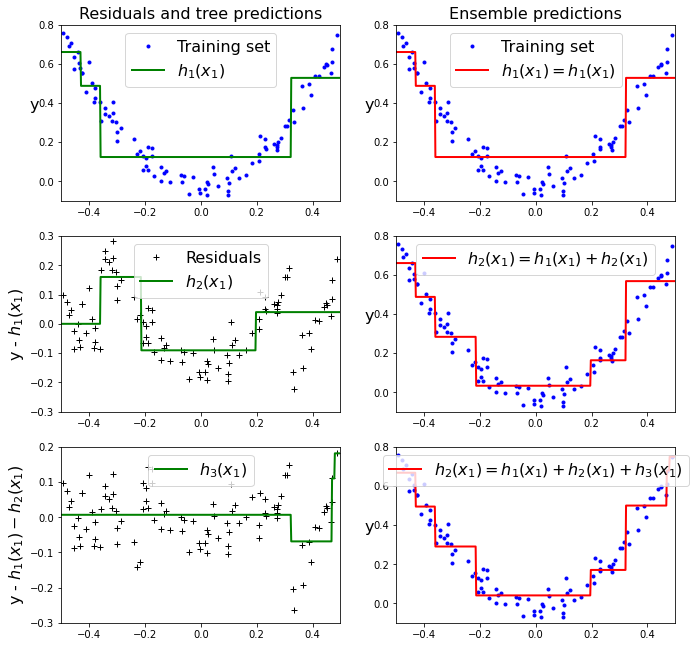

In [66]:
plt.figure(figsize = (11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes = [-0.5, 0.5, -0.1, 0.8], 
                 label = "$h_1(x_1)$", data_label = "Training set", style="g-")
plt.ylabel("y", fontsize = 16, rotation = 0)
plt.title("Residuals and tree predictions", fontsize = 16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes = [-0.5, 0.5, -0.1, 0.8], 
                 label = "$h_1(x_1) = h_1(x_1)$", data_label = "Training set")
plt.ylabel("y", fontsize = 16, rotation = 0)
plt.title("Ensemble predictions", fontsize = 16)


plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes = [-0.5, 0.5, -0.3, 0.3], 
                 label = "$h_2(x_1)$", data_label = "Residuals", style="g-", data_style="k+")
plt.ylabel("y - $h_1(x_1)$", fontsize = 16, rotation = 90)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes = [-0.5, 0.5, -0.1, 0.8], 
                 label = "$h_2(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("y", fontsize = 16, rotation = 0)



plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes = [-0.5, 0.5, -0.3, 0.2], 
                 label = "$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("y - $h_1(x_1) - h_2(x_1)$", fontsize = 16, rotation = 90)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes = [-0.5, 0.5, -0.1, 0.8], 
                 label = "$h_2(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.ylabel("y", fontsize = 16, rotation = 0)

In [69]:
# a simple way is to use GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbrt_1 = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, 
                                 learning_rate = 1)
gbrt_1.fit(X, y)

gbrt_2 = GradientBoostingRegressor(max_depth = 2, n_estimators = 200, 
                                 learning_rate = 0.1)
gbrt_2.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200)

Text(0.5, 1.0, 'learning_rate = 0.1, n_estimators = 200')

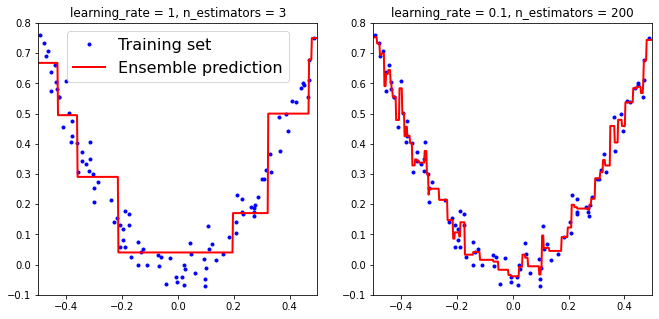

In [74]:
plt.figure(figsize = (11, 5))

plt.subplot(121)
plot_predictions([gbrt_1], X, y, axes = [-0.5, 0.5, -0.1, 0.8], 
                 label = "Ensemble prediction", data_label = "Training set")
plt.title("learning_rate = 1, n_estimators = 3")

plt.subplot(122)
plot_predictions([gbrt_2], X, y, axes = [-0.5, 0.5, -0.1, 0.8], 
                 )

plt.title("learning_rate = 0.1, n_estimators = 200")

In [87]:
# code trains a GBRT ensemble with 120 trees, 
# then measures the validation error at each stage of training to find the optimal number of trees
# and then finally trains another GBRT ensemble using the optimal number of trees

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 49)

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)
          ]
bst_n_estimators = np.argmin(errors)+1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=56)

Text(0.5, 0, '$x_1$')

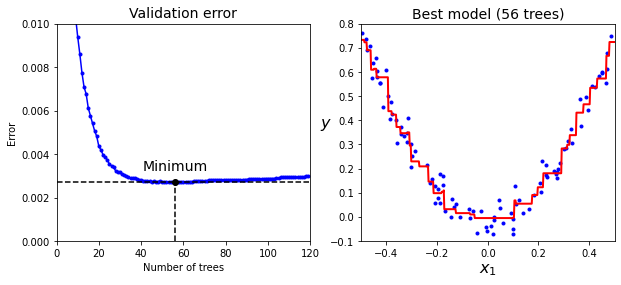

In [107]:
min_error = np.min(errors)


plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators ], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.ylabel("Error")
plt.xlabel("Number of trees")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.title("Validation error", fontsize=14)


plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes = [-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize = 14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)


In [108]:
# can also force to stop training early by setting warm_start = True
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True)

min_val_error = float("inf")
error_going_up = 0

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [109]:
print(gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

61
Minimum validation MSE: 0.002712853325235463


### Using XGBoost
Stands for Extreme Gradient Boosting. It aims to be extremely fast, scalable, and portable. 

In [111]:
import xgboost

In [113]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

val_error = mean_squared_error(y_val, y_pred)  
print("Validation MSE:", val_error)          

[19:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.0028512559726563943


In [115]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train)

[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [116]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

10 loops, best of 5: 31.4 ms per loop


## Stacking
Instead of using trivial functions (e.g., hard voting) to aggregate the predictions of all predictors in an ensemble, one trains a model to perform the aggregation. 

Example is from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.830 (0.046)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.965 (0.018)


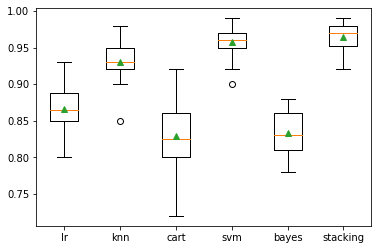

In [119]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()